In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt


In [3]:
current_path = os.path.join(os.getcwd(), '..')
base_path = f'{current_path}/data/raw/cats_and_dogs_filtered'
train_path = os.path.join(f'{base_path}/train/')
validation_path = os.path.join(f'{base_path}/validation/')

In [6]:
# (train / validation)
dogs_dataset = (os.path.join(train_path, 'dogs'),
                os.path.join(validation_path, 'dogs'))
cats_dataset = (os.path.join(train_path, 'cats'),
                os.path.join(validation_path, 'cats'))

IMG_HEIGHT = 299
IMG_WIDTH = 299

In [13]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 299, 299, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 149, 149, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 74, 74, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 87616)            

In [14]:
batch_size = 128
epochs = 50

train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_path,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_path,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
total_train = len(os.listdir(dogs_dataset[0])) + len(os.listdir(cats_dataset[0]))
total_val = len(os.listdir(dogs_dataset[1])) + len(os.listdir(cats_dataset[1]))


history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 15 steps, validate for 7 steps
Epoch 1/50
15/15 [==============================] - 287s 19s/step - loss: 1.8348 - accuracy: 0.5043 - val_loss: 0.6894 - val_accuracy: 0.5915
Epoch 2/50
15/15 [==============================] - 241s 16s/step - loss: 0.6841 - accuracy: 0.5417 - val_loss: 0.6690 - val_accuracy: 0.5848
Epoch 3/50
15/15 [==============================] - 243s 16s/step - loss: 0.6672 - accuracy: 0.5682 - val_loss: 0.6472 - val_accuracy: 0.5748
Epoch 4/50
15/15 [==============================] - 232s 15s/step - loss: 0.6368 - accuracy: 0.5935 - val_loss: 0.6301 - val_accuracy: 0.5982
Epoch 5/50
15/15 [==============================] - 269s 18s/step - loss: 0.6011 - accuracy: 0.6325 - val_loss: 0.6120 - val_accuracy: 0.6250
Epoch 6/50
15/15 [==============================] - 218s 15s/step - loss: 0.5479 - accuracy: 0.6838 - val_loss: 0.6029 - val_accuracy: 0.6808
Epoch 7/50
15/15 [==============================] - 215s 

TypeError: Image data of dtype <U1 cannot be converted to float

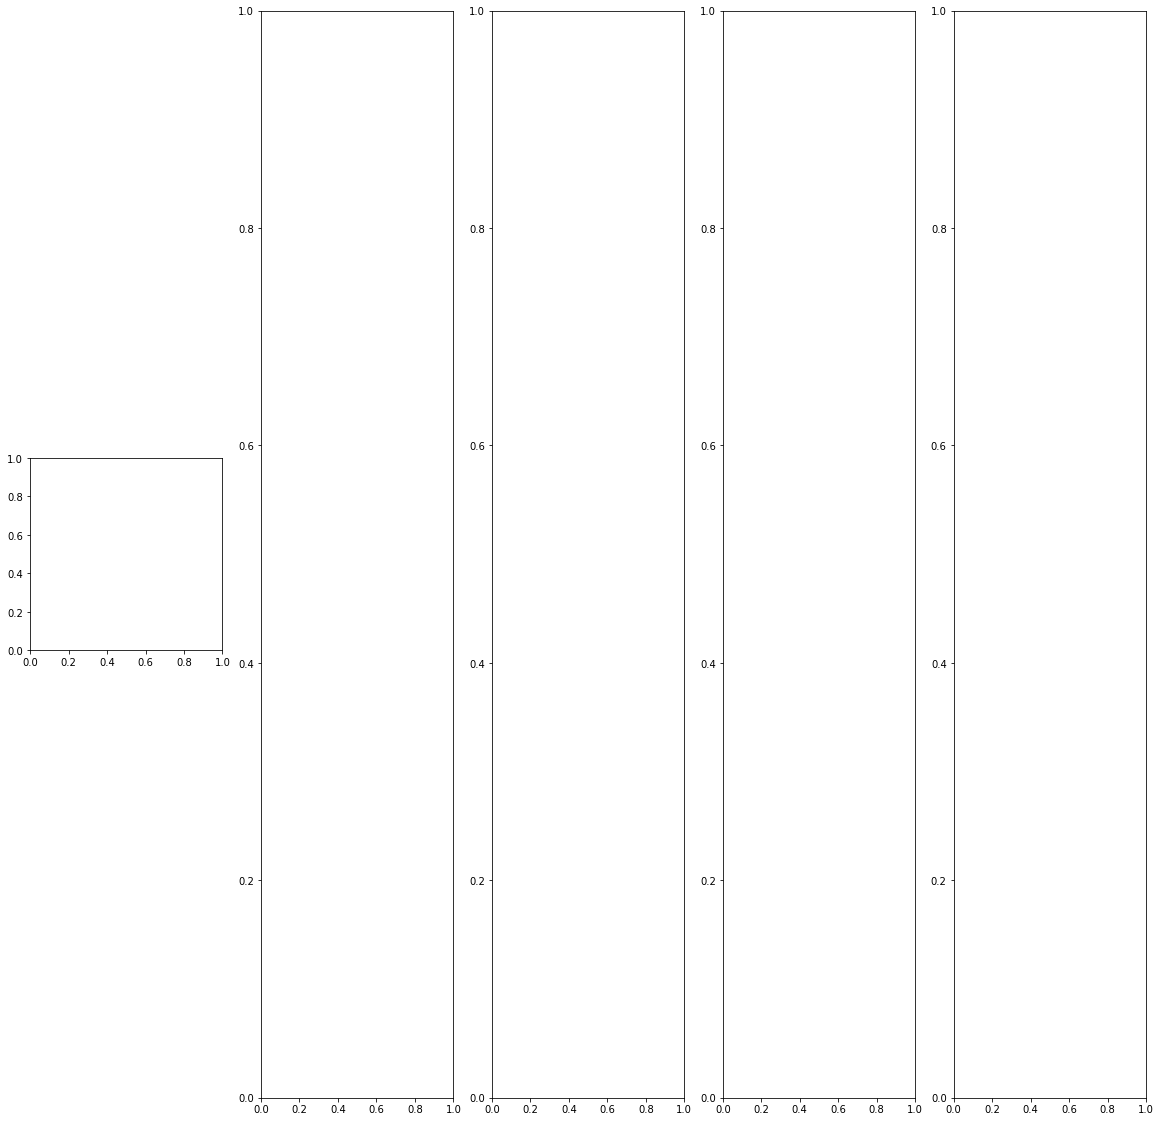